Total conversations: 513
Unique topics: 22

Top 10 topics by frequency:
conversational commerce: 57
ongoing promotionsn: 40
product not listed: 38
product information: 38
payment: 33
still thinking / not sure yet: 32
follow-up after quote: 29
refund: 28
cancellation: 27
login issues: 26


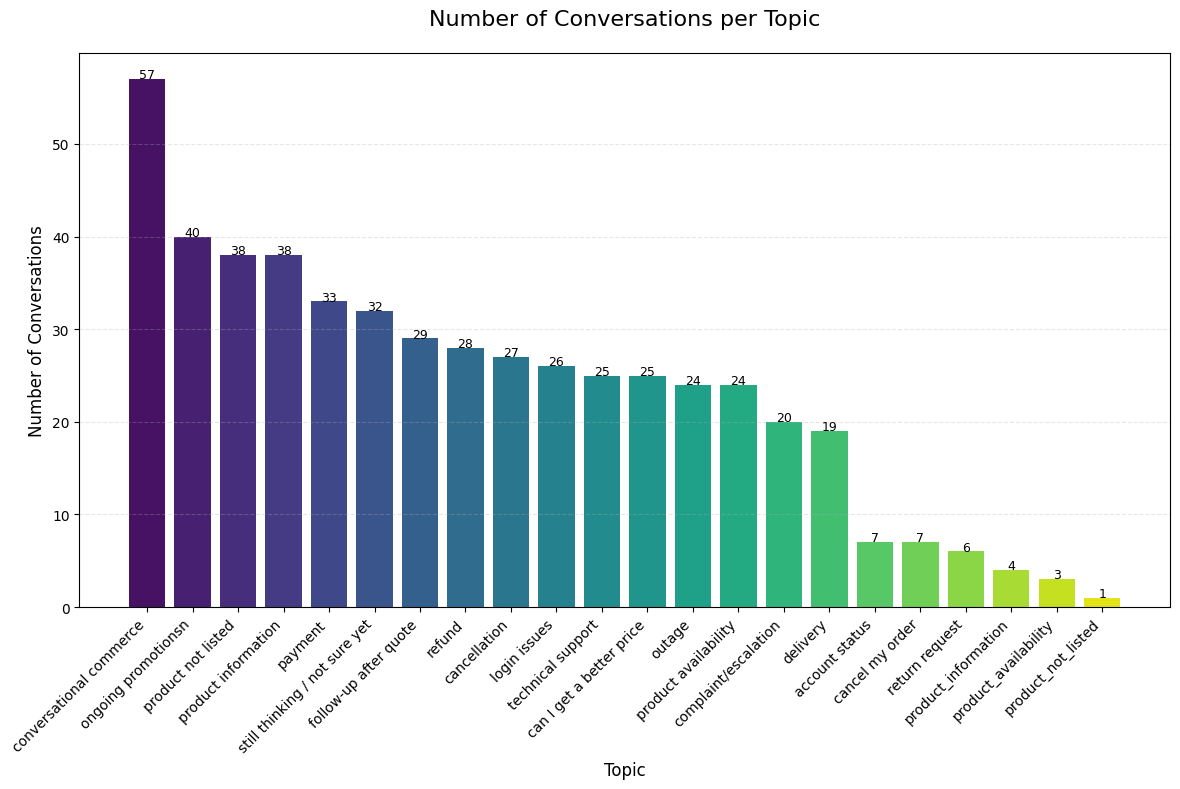

Visualization saved to topic_distribution.png


In [4]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
from pathlib import Path

file_path = "gulf_chats_merged.json"
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

topics = [chat["chat_id"].rsplit("_", 1)[0].strip() for chat in data]
topic_counts = Counter(topics)

sorted_topics = dict(sorted(topic_counts.items(), key=lambda x: x[1], reverse=True))


print(f"Total conversations: {len(data)}")
print(f"Unique topics: {len(topic_counts)}")
print("\nTop 10 topics by frequency:")
for topic, count in list(sorted_topics.items())[:10]:
    print(f"{topic}: {count}")


plt.figure(figsize=(12, 8))
colors = sns.color_palette("viridis", len(sorted_topics))


bars = plt.bar(sorted_topics.keys(), sorted_topics.values(), color=colors)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("Number of Conversations per Topic", fontsize=16, pad=20)
plt.xlabel("Topic", fontsize=12)
plt.ylabel("Number of Conversations", fontsize=12)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{height:.0f}', ha='center', fontsize=9)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.3)

output_path = Path("topic_distribution.png")
plt.savefig(output_path, dpi=300, bbox_inches="tight")
plt.show()

print(f"Visualization saved to {output_path}")

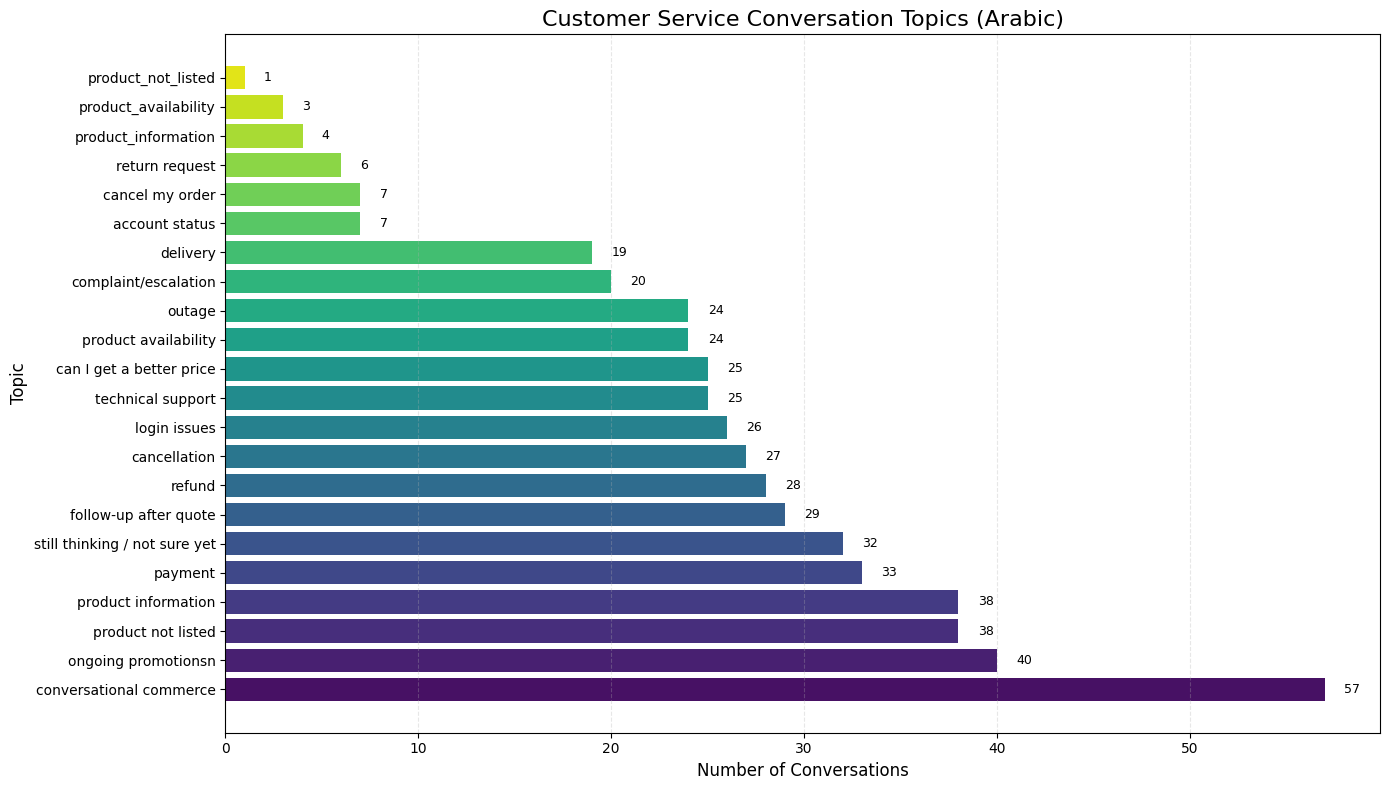

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data from your list
topics_data = {
    'payment': 33,
    'delivery': 19,
    'outage': 24,
    'refund': 28,
    'technical support': 25,
    'conversational commerce': 57,
    'cancellation': 27,
    'login issues': 26,
    'product not listed': 38,
    'product availability': 24,
    'product information': 38,
    'follow-up after quote': 29,
    'complaint/escalation': 20,
    'product_information': 4,
    'can I get a better price': 25,
    'ongoing promotionsn': 40,
    'still thinking / not sure yet': 32,
    'account status': 7,
    'return request': 6,
    'cancel my order': 7,
    'product_not_listed': 1,
    'product_availability': 3
}

df = pd.DataFrame(list(topics_data.items()), columns=['Topic', 'Count'])
df = df.sort_values('Count', ascending=False)

plt.figure(figsize=(14, 8))
colors = sns.color_palette("viridis", len(df))

bars = plt.barh(df['Topic'], df['Count'], color=colors)
plt.xlabel('Number of Conversations', fontsize=12)
plt.ylabel('Topic', fontsize=12)
plt.title('Customer Service Conversation Topics (Arabic)', fontsize=16)

for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 1
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width:.0f}', 
             va='center', fontsize=9)

plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.savefig('arabic_customer_service_topics.png', dpi=300, bbox_inches='tight')
plt.show()